In [1]:
import math,copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#this is data
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

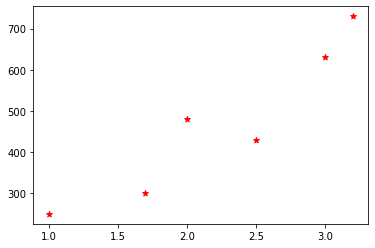

In [3]:
plt.scatter(x_train,y_train,c="red",marker="*")
plt.show()


The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [4]:
#just code the equation
def compute_cost(x,y,w,b):
    m=x.shape[0]
    
    cost_sum=0

    
    for i in range(m):
        f_wb=w*x[i]+b
        cost=(f_wb-y[i])**2
        cost_sum=cost_sum+cost
    
    total_cost=(1/(2*m))*cost_sum
    
    return total_cost

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [5]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    
    for i in range(m):
        f_wb=w*x[i]+b
        
        dj_dw_i=(f_wb-y[i])*x[i]
        dj_db_i=f_wb-y[i]
        
        dj_db+=dj_db_i
        dj_dw+=dj_dw_i
        
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db
        

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_cost(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [7]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.09e+05  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  1.170e+01, b: 4.70000e+00
Iteration 1000: Cost 1.78e+03  dj_dw: -1.060e+00, dj_db:  2.599e+00   w:  1.974e+02, b: 3.16325e+01
Iteration 2000: Cost 1.74e+03  dj_dw: -4.357e-01, dj_db:  1.068e+00   w:  2.045e+02, b: 1.44256e+01
Iteration 3000: Cost 1.74e+03  dj_dw: -1.790e-01, dj_db:  4.388e-01   w:  2.074e+02, b: 7.35495e+00
Iteration 4000: Cost 1.74e+03  dj_dw: -7.357e-02, dj_db:  1.803e-01   w:  2.085e+02, b: 4.44950e+00
Iteration 5000: Cost 1.74e+03  dj_dw: -3.023e-02, dj_db:  7.410e-02   w:  2.090e+02, b: 3.25559e+00
Iteration 6000: Cost 1.74e+03  dj_dw: -1.242e-02, dj_db:  3.045e-02   w:  2.092e+02, b: 2.76500e+00
Iteration 7000: Cost 1.74e+03  dj_dw: -5.104e-03, dj_db:  1.251e-02   w:  2.093e+02, b: 2.56340e+00
Iteration 8000: Cost 1.74e+03  dj_dw: -2.097e-03, dj_db:  5.141e-03   w:  2.093e+02, b: 2.48056e+00
Iteration 9000: Cost 1.74e+03  dj_dw: -8.619e-04, dj_db:  2.113e-03   w:  2.094e+02, b: 2.44652e+00


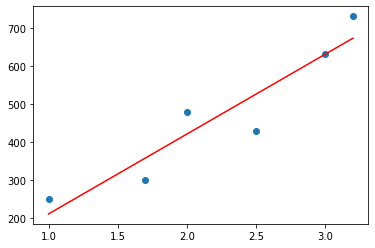

In [8]:
predicted_value= b_final + w_final*x_train
plt.scatter(x_train,y_train)
plt.plot([min(x_train),max(x_train)],[min(predicted_value),max(predicted_value)],color='red')
plt.show()

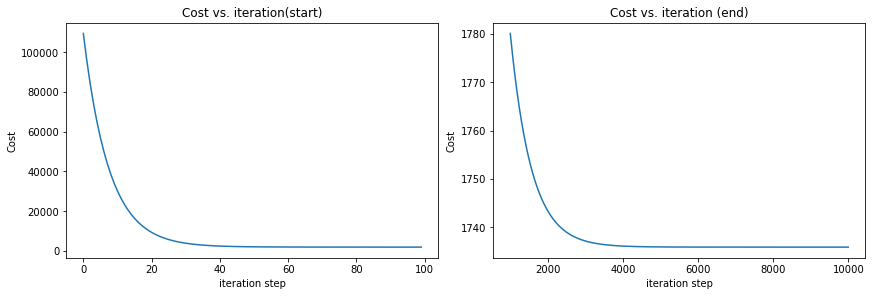

In [9]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

Predictions

In [10]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 211.8 Thousand dollars
1200 sqft house prediction 253.7 Thousand dollars
2000 sqft house prediction 421.2 Thousand dollars


In [11]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.15e+06  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  9.361e+02, b: 3.76000e+02
Iteration    1: Cost 3.75e+07  dj_dw:  4.878e+03, dj_db:  1.997e+03   w: -2.966e+03, b:-1.22136e+03
Iteration    2: Cost 6.55e+08  dj_dw: -2.040e+04, dj_db: -8.315e+03   w:  1.335e+04, b: 5.43087e+03
Iteration    3: Cost 1.14e+10  dj_dw:  8.524e+04, dj_db:  3.478e+04   w: -5.484e+04, b:-2.23947e+04
Iteration    4: Cost 2.00e+11  dj_dw: -3.563e+05, dj_db: -1.453e+05   w:  2.302e+05, b: 9.38831e+04
Iteration    5: Cost 3.49e+12  dj_dw:  1.489e+06, dj_db:  6.075e+05   w: -9.611e+05, b:-3.92125e+05
Iteration    6: Cost 6.10e+13  dj_dw: -6.224e+06, dj_db: -2.539e+06   w:  4.018e+06, b: 1.63915e+06
Iteration    7: Cost 1.06e+15  dj_dw:  2.601e+07, dj_db:  1.061e+07   w: -1.679e+07, b:-6.85069e+06
Iteration    8: Cost 1.86e+16  dj_dw: -1.087e+08, dj_db: -4.435e+07   w:  7.019e+07, b: 2.86330e+07
Iteration    9: Cost 3.25e+17  dj_dw:  4.544e+08, dj_db:  1.854e+08   w: -2.933e+08, b:-1.19673e+08


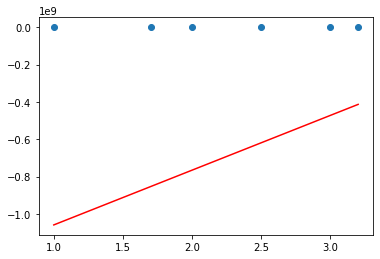

In [12]:
predicted_value= b_final + w_final*x_train
plt.scatter(x_train,y_train)
plt.plot([min(x_train),max(x_train)],[min(predicted_value),max(predicted_value)],color='red')
plt.show()